
    \begin{table}
    \fontsize{6}{7.2}\selectfont
    \centering
    \caption{This is a table with scientific results.}
    \medskip
    \begin{tabular}{p{.06\textwidth}p{.105\textwidth}p{.08\textwidth}p{.105\textwidth}p{.08\textwidth}p{.105\textwidth}p{.08\textwidth}p{.105\textwidth}p{.08\textwidth}}
    \hline
    & \multicolumn{2}{l}{AS19}& \multicolumn{2}{l}{Flow Calib.}& \multicolumn{2}{l}{AS19 Resampled}& \multicolumn{2}{l}{Flow+Mass Calib.} \\ 
\cline{2-9} \\ 
 & 50th [5th, 95th] & [16th, 84th] & 50th [5th, 95th] & [16th, 84th] & 50th [5th, 95th] & [16th, 84th] & 50th [5th, 95th] & [16th, 84th]  \\ 
& percentiles & percentiles & percentiles & percentiles & percentiles & percentiles & percentiles & percentiles  \\ 
& (cm SLE) & (cm SLE) & (cm SLE) & (cm SLE) & (cm SLE) & (cm SLE) & (cm SLE) & (cm SLE)  \\ 
\hline 
RCP 2.6 & 11 [2, 25] & [6, 19 ]& 8 [2, 18] & [4, 14 ]& 9 [4, 14] & [6, 12 ]& 8 [4, 14] & [5, 12 ] \\ 
RCP 4.5 & 15 [4, 30] & [8, 23 ]& 11 [3, 24] & [6, 18 ]& 12 [5, 2

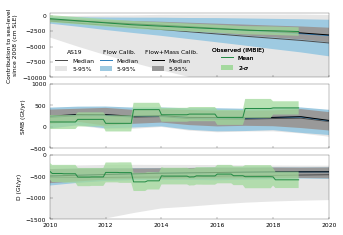

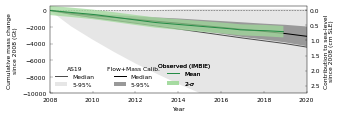

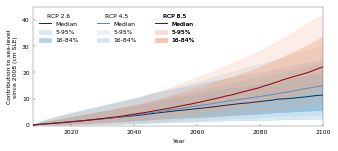

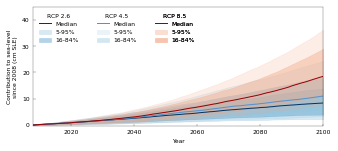

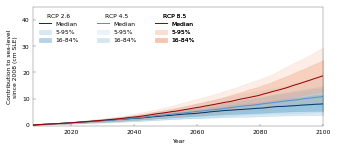

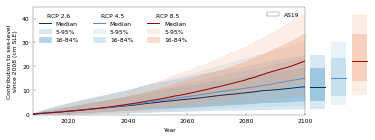

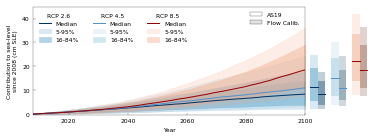

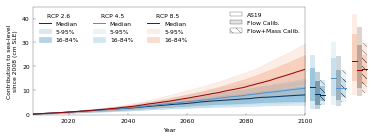

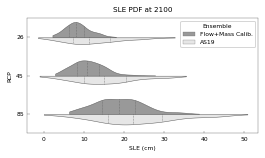

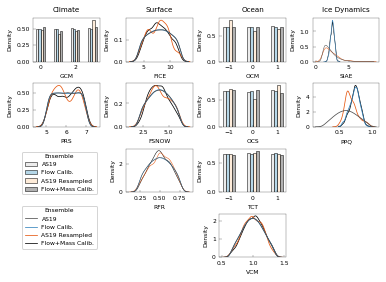

In [10]:
run calibrate-as19.py

In [2]:
        hatch_pattern_dict = {"Flow+Mass Calib.": "", "Flow Calib.": "......", "AS19": "\\\\\\"}


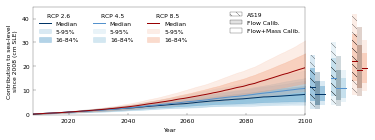

In [8]:
    plot_projection(
        "projection_calibrated_bars.pdf",
        simulated=all_df,
        quantiles=[0.05, 0.16, 0.84, 0.95],
        bars=["AS19", "Flow Calib.", "Flow+Mass Calib."],
    )


['\\\\\\']